# PLAY STORE MARKET ANALYSIS

By- Vikrant Choudhary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

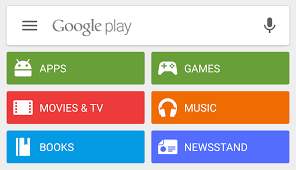

In [2]:
from IPython.display import Image
Image(filename ='image1.png',width =500,height =500)

In [3]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('ggplot')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


# importing data

In [5]:
 df = pd.read_csv('googleplaystore.csv')

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
print('the shape of the data is',df.shape)

the shape of the data is (10841, 13)


In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


the only numerical column present here is rating

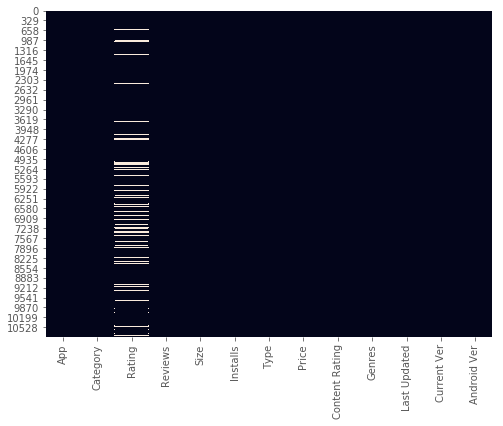

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar =False)

In [11]:
total = df.isnull().sum().sort_values(ascending  = False)
percentage = (df.isnull().sum()/df.count()).sort_values(ascending = False)
temp = pd.concat([total, percentage], axis = 1,keys = ['total','percentage'])
temp.head()

,total,percentage
Rating,1474,0.157361
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


There are some missing values in other columns too which were not noticed earlier durig the heatmap

In [12]:
#Dropping Down All The observations containing missing vakues

df.dropna(how = 'any',inplace  =True)


# Checking the duplicate values 

In [13]:
print("Number of Unique App names = ", len(df['App'].unique()))
print("NUMBER of the Total App name = ", df.shape[0])
print("Duplicate Apps = ",len(df['App'])- len(df['App'].unique()))

Number of Unique App names =  8190
NUMBER of the Total App name =  9360
Duplicate Apps =  1170


In [14]:
#checking hoe the duplicate value looks like
df[df['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


so its better to  delete all the dulicate values and keeping the dataset clean

In [15]:
df.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)




# EDA(Exploratory Data Analysis)


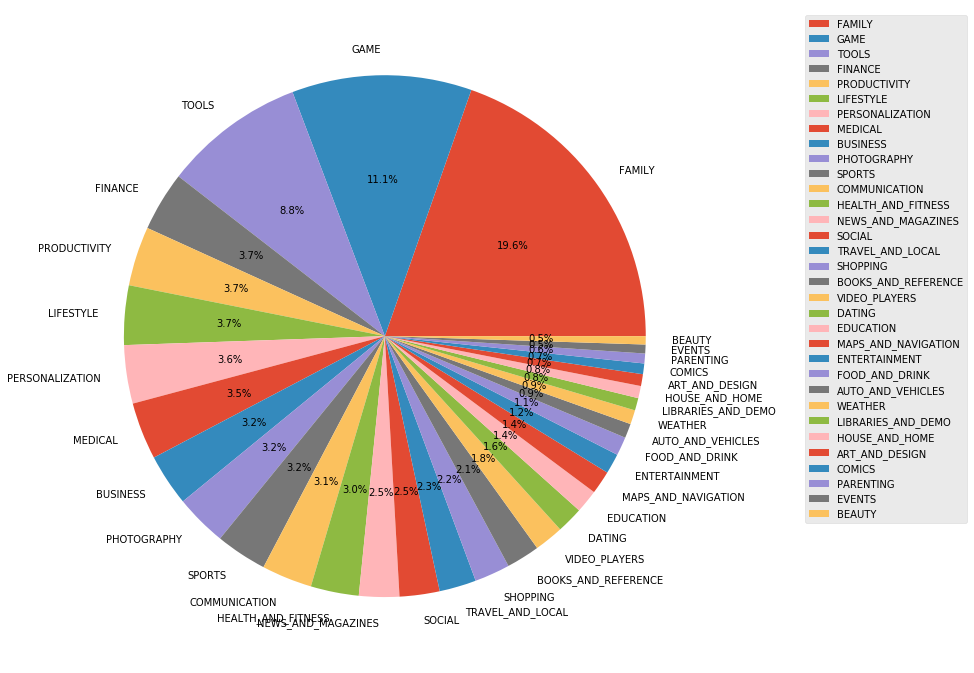

In [16]:
temp = df['Category'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()


Observation: (Pie Chart)
The FAMILY, EVENTS and TOOLS are the most dominating applications in the playstore
     

--------------------------------------RATINGS-------------------------------------------

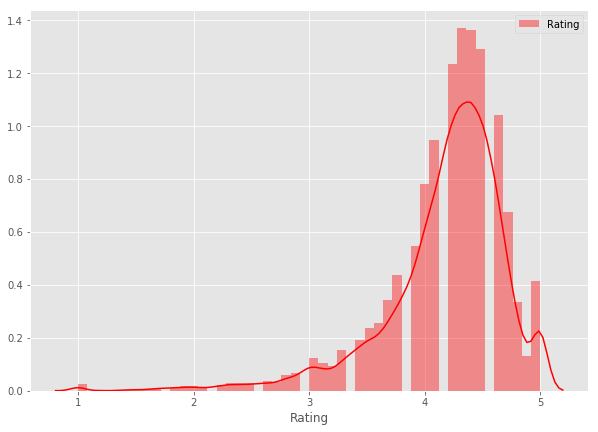

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(df['Rating'],color = 'red')
plt.legend(['Rating'])
plt.show()

In [18]:
print('The average rating in the playstore is',df['Rating'].mean())

The average rating in the playstore is 4.173321123321126


In [19]:
top = np.array(df.Category.value_counts().reset_index()['index'])
print('Most occuring categories are \n',top[:6])

Most occuring categories are 
 ['FAMILY' 'GAME' 'TOOLS' 'FINANCE' 'PRODUCTIVITY' 'LIFESTYLE']


Visualizing all the ratings separately

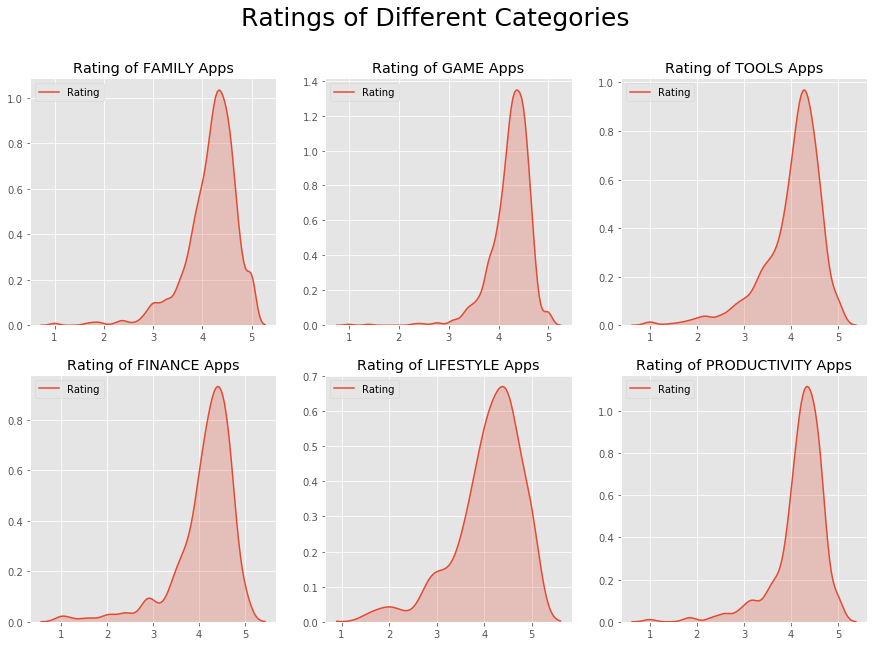

In [20]:
plt.figure(figsize= (15,10))
plt.suptitle("Ratings of Different Categories",fontsize = 25)

plt.subplot(2,3,1)
sns.kdeplot(df[df['Category'] == 'FAMILY']['Rating'], shade = True)
plt.title('Rating of FAMILY Apps')

plt.subplot(2,3,2)
sns.kdeplot(df[df['Category'] == 'GAME']['Rating'], shade = True)
plt.title('Rating of GAME Apps')


plt.subplot(2,3,3)
sns.kdeplot(df[df['Category'] == 'TOOLS']['Rating'], shade = True)
plt.title('Rating of TOOLS Apps')


plt.subplot(2,3,4)
sns.kdeplot(df[df['Category'] == 'FINANCE']['Rating'], shade = True)
plt.title('Rating of FINANCE Apps')


plt.subplot(2,3,5)
sns.kdeplot(df[df['Category'] == 'LIFESTYLE']['Rating'], shade = True)
plt.title('Rating of LIFESTYLE Apps')


plt.subplot(2,3,6)
sns.kdeplot(df[df['Category'] == 'PRODUCTIVITY']['Rating'], shade = True)
plt.title('Rating of PRODUCTIVITY Apps')

plt.show()


# ANOVA ANALYSIS

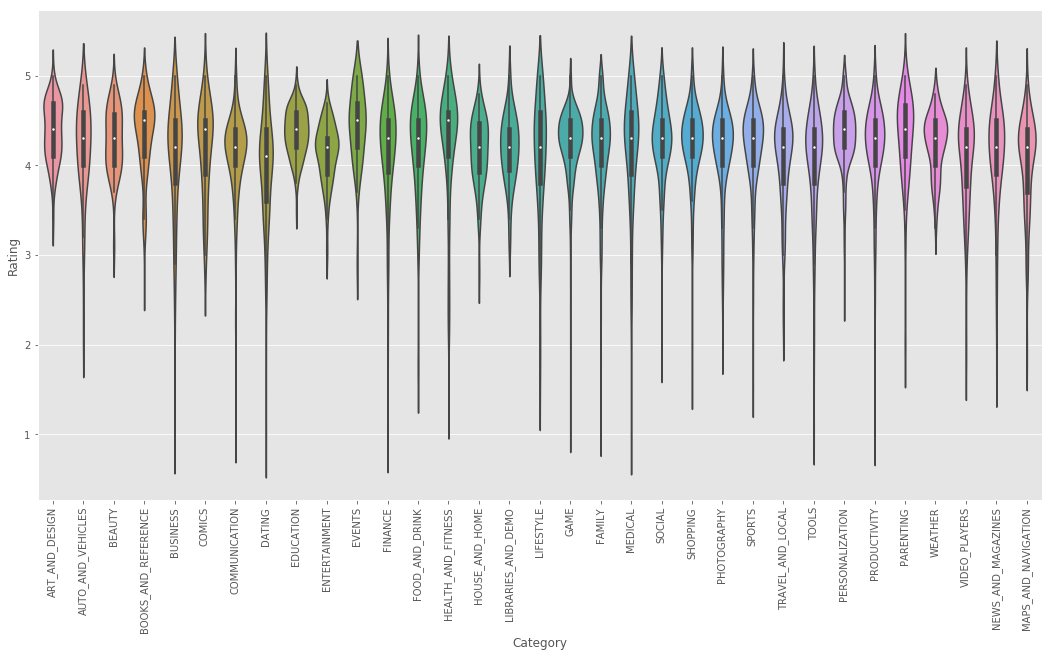

In [21]:
plt.figure(figsize=(18,9))
f = sns.violinplot(x = df['Category'], y = df['Rating'])
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.show()

Categories like EVENTS , BOOKS_AND_REFERENCE and HEALTH_AND_FITNESS are the best performing with more than half of the apps rated above average.
While categories like DATING are worst performing.

# REVIEWS

In [22]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

converting bject type to integer type

Text(0.5, 1.0, 'Distribution of Ratings')

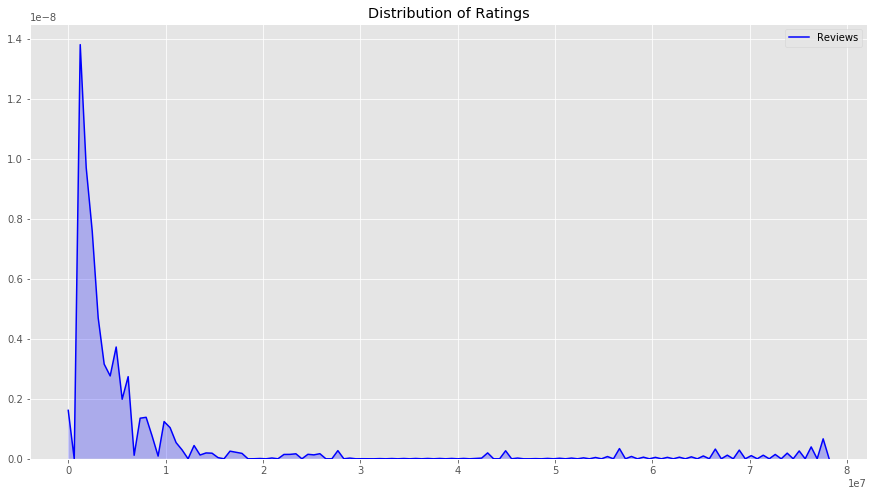

In [23]:
df['Reviews'] = df['Reviews'].astype(dtype = 'int')
plt.figure(figsize=(15,8))
sns.kdeplot(df['Reviews'], color = 'blue', shade = True)
plt.title('Distribution of Ratings')

In [24]:
print("Number of Apps with more than 1M reviews",df[df['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n",df[df['Reviews'] > 1000000].sort_values(by = 'Reviews', ascending = False).head(20)['App'])

Number of Apps with more than 1M reviews 349

Top 20 apps with most reviews: 
 2544                                             Facebook
336                                    WhatsApp Messenger
2545                                            Instagram
335              Messenger – Text and Video Chat for Free
1670                                       Clash of Clans
4005              Clean Master- Space Cleaner & Antivirus
1654                                       Subway Surfers
3665                                              YouTube
7536    Security Master - Antivirus, VPN, AppLock, Boo...
1660                                         Clash Royale
1655                                     Candy Crush Saga
378           UC Browser - Fast Download Private & Secure
2550                                             Snapchat
4568      360 Security - Free Antivirus, Booster, Cleaner
1722                                       My Talking Tom
1675                                          8 Bal

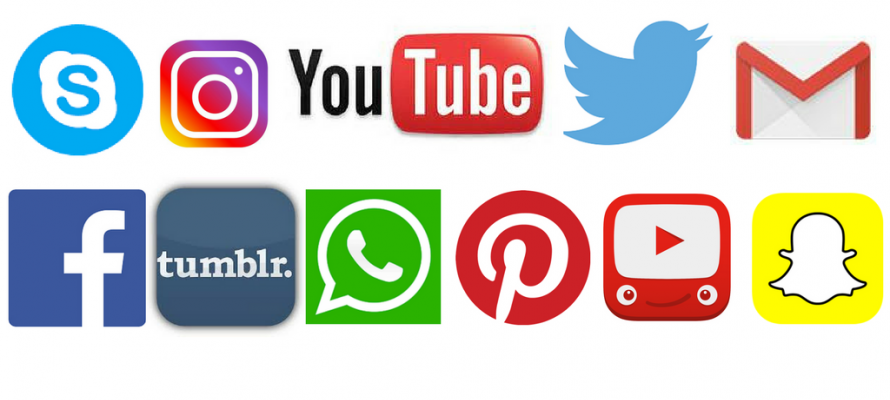

In [25]:

Image(filename ='pyimage.png',width =1400,height =1400)

for all apsps more tahn 1M reviews


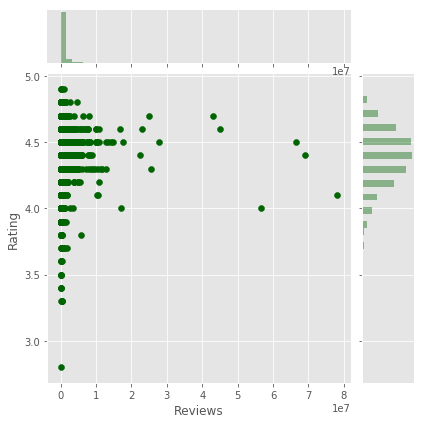

for apps below 1M reviews


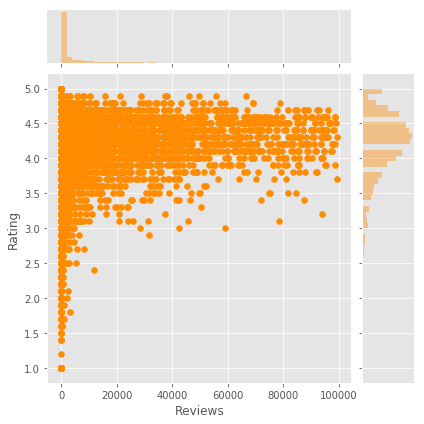

In [26]:
print('for all apsps more tahn 1M reviews')
sns.jointplot(x='Reviews',y='Rating',data =df[df['Reviews']>100000],color='darkgreen')
plt.show()

print('for apps below 1M reviews')
sns.jointplot(x='Reviews',y='Rating',data =df[df['Reviews']<100000],color ='darkorange')
plt.show()

observation:(JOINT PLOT)
    The most reviewed apps are likely to be better rated

# ----------------------------------------------INSTALLS------------------------------------------------------

In [27]:
df['Installs'].dtype

dtype('O')

Since the datatype here is object so we need to convert it to integer for further plotting

In [28]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Removing all the commas and plus sign

In [29]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].astype(dtype = 'int')

In [30]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

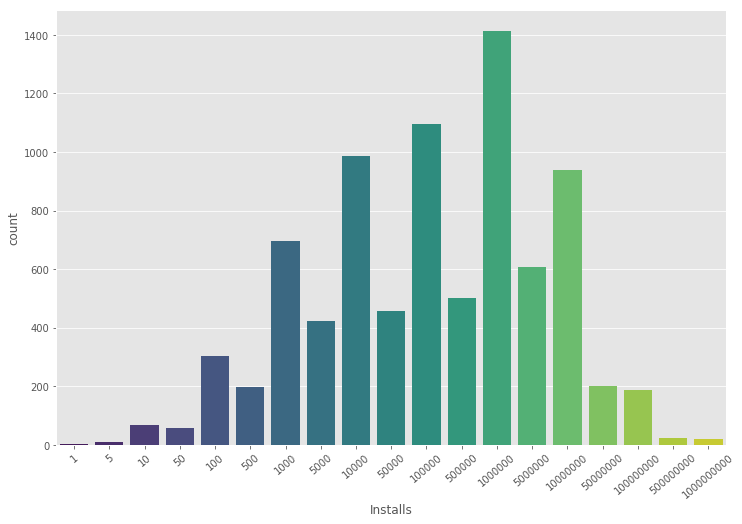

In [31]:
plt.figure(figsize=(12,8))
f = sns.countplot(df['Installs'], palette= "viridis" )
f.set_xticklabels(f.get_xticklabels(), rotation = 40)
plt.show()

We can observe that most of the apps beongs to the 1M+ category

In [32]:
sorted_values = sorted(df['Installs'].unique())
df['Installs Classes'] = df['Installs'].replace(sorted_values, range(0,len(sorted_values)))
df['Installs Classes'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs Classes, dtype: int64

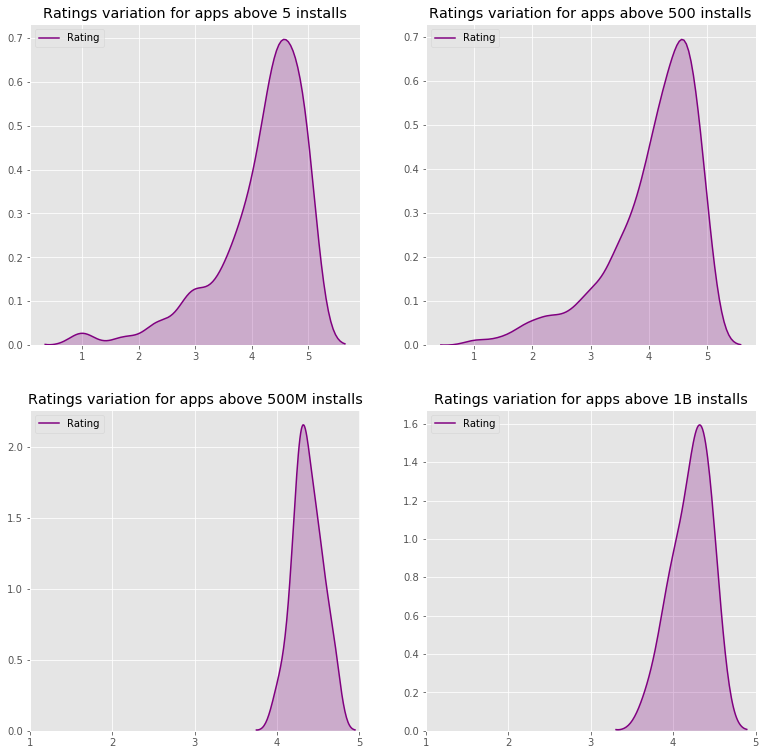

Variation in Rating of installs above 100 installs  0.19220659514434993
Variation in Rating of installs above 500 installs  0.19421616269909778
Variation in Rating of installs above 500M installs  0.03972695926593183
Variation in Rating of installs above 1B installs  0.05212709974548002


In [33]:
import scipy.stats as sp

plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
f = sns.kdeplot(df[df['Installs Classes'] == 5]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 5 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,2)
f = sns.kdeplot(df[df['Installs Classes'] == 6]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,3)
f = sns.kdeplot(df[df['Installs Classes'] == 17]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500M installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,4)
f = sns.kdeplot(df[df['Installs Classes'] == 18]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 1B installs")
f.set_xticks([1,2,3,4,5])

plt.show()
print("Variation in Rating of installs above 100 installs ",sp.variation(df[df['Installs Classes'] == 5]['Rating']))
print("Variation in Rating of installs above 500 installs ",sp.variation(df[df['Installs Classes'] == 6]['Rating']))
print("Variation in Rating of installs above 500M installs ",sp.variation(df[df['Installs Classes'] == 17]['Rating']))
print("Variation in Rating of installs above 1B installs ",sp.variation(df[df['Installs Classes'] == 18]['Rating']))

## -------------------------------------------------SIZE---------------------------------------------------------------------------

In [34]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [35]:
print(df['Size'].unique())

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7M' '78M' '72M' '4

There's an uncanny observation as a value has label like 'Varies with device' rather than the actual size. So we better replace it with some mean or median values

There are two problems with this column:

It contains values named 'Varies with device'
It contains Ms and ks in the size
Type of values is string
We can't omit the Ms and Ks since that would mess up the KB and MB size scale. So we convert the MBs to KBs.
One way to do this is below

In [36]:
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '*1000'))
df['Size'] = df['Size'].apply(lambda x: x.replace('k', ''))

Using -1 as the signal for the values 'Varies with device' as it will allow eval to be used on the column.

In [37]:
df['Size'].replace('Varies with device', '-1', inplace = True)

In [38]:
f['Size'] = df['Size'].apply(lambda x: eval(x))

TypeError: 'AxesSubplot' object does not support item assignment

In [ ]:
df['Size'] = df['Size'].replace(-1,np.nan) #Changing the values to null then we can fill them with mean value
df['Size'].fillna(np.mean(df['Size']), inplace = True)

In [ ]:
plt.figure(figsize=(18,9))
sns.distplot(df['Size'])
plt.xlabel('Size in KBs')
plt.xticks(list(range(0, int(max(df['Size'])), 5000)))
plt.show

From the above graph we can easily see that apps with size 4-5MB or 20-25MB are more likely to be downloaded 

In [ ]:
plt.figure(figsize=(10,12))
plt.scatter(x = df['Size'], y = df['Rating'], color = 'yellow')
plt.xlabel('Size in KBs')
plt.ylabel('Rating')
plt.title('Rating vs Size')
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
sns.regplot(y=df['Size'],x=df['Installs Classes'],color='black')
plt.title('Size vs Installs')
plt.show()

###    ------------------------------------------TYPE---------------------------------------------------

In [ ]:
temp = df['Type'].value_counts().reset_index()
rcParams['figure.figsize'] = 9,9
plt.pie(x = temp['Type'], labels= temp['index'], autopct= '%1.1f%%', colors = ['lightblue','lightpink'], 
        shadow= True,startangle=90,explode=(0.25,0))
plt.show()

Play Store only Contains 7.4% Paid Apps

## ----------------------------------------------PRICE------------------------------------

In [ ]:
df['Price'].unique()

In [ ]:
df['Price']=df['Price'].apply( lambda x: x.replace('$',''))
df['Price']=df['Price'].astype('float')

In [ ]:
plt.figure(figsize=(10,7))
sns.kdeplot(df[df['Type'] == 'Paid']['Price'], color = 'red', shade = True)
plt.xlabel('Prices of Apps')
plt.title('Pricing Distribution of Paid Apps')
plt.show()

We Can Observe That majority of the paid apps are cheap

## RATING VS PRICING

In [ ]:
a = df[df['Type'] == 'Paid']

In [ ]:
sns.jointplot(y = a['Rating'], x = a['Price'], color= 'teal')

we can see that highly expensive apps are not necessarily well rated